In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

# Load the dataset

In [2]:
data = pd.read_csv("clustered_forestfires.csv")
data.loc[:, "log_area"] = np.log(data["area"] + 1)

In [3]:
data.head(10)

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster,log_area
0,0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,2,0.0
1,1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0.0
2,2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0.0
3,3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0.0
4,4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1,0.0
5,5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,0.0
6,6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,0.0
7,7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,1,0.0
8,8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,2,0.0
9,9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,3,0.0


# Area and time

<AxesSubplot:xlabel='log_area', ylabel='Count'>

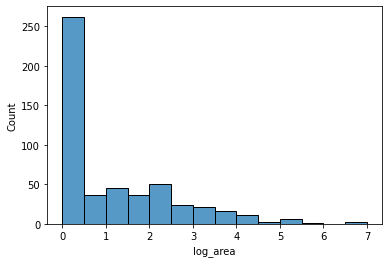

In [5]:
sbs.histplot(data["log_area"])

In [6]:
data["region"] = list(zip(data["X"], data["Y"]))

<AxesSubplot:xlabel='region', ylabel='log_area'>

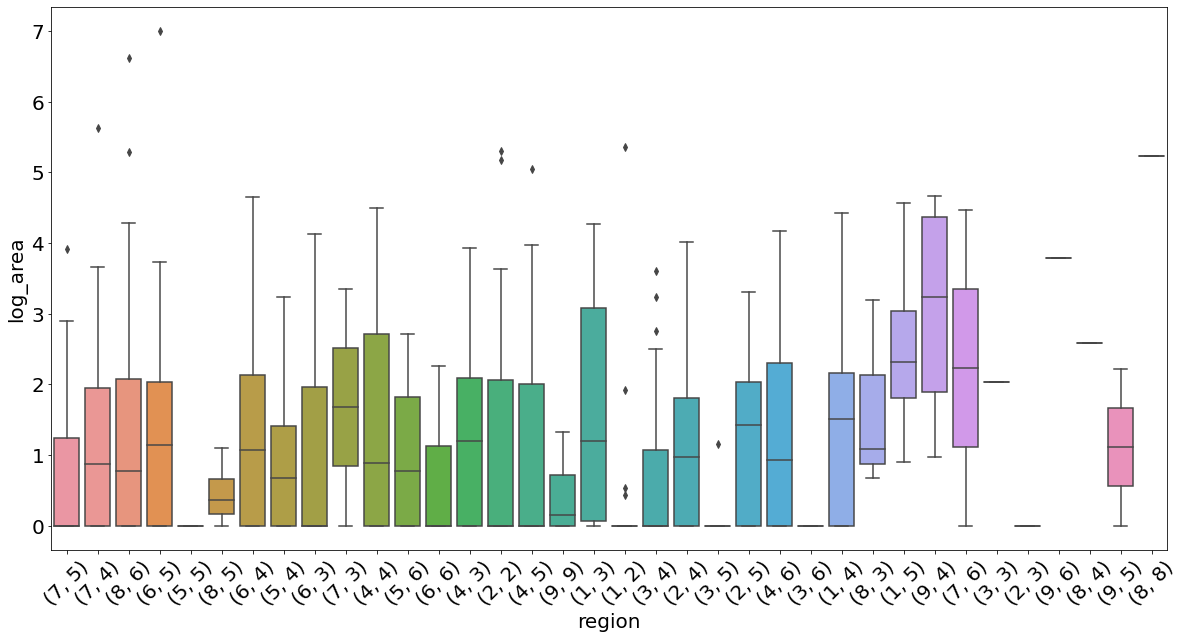

In [20]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, fontsize=20)
plt.xlabel("Region", fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Log_area", fontsize=20)
sbs.boxplot(x=data["region"], y=data["log_area"])

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

region_data = pd.DataFrame({"region": data["region"], "area": data["log_area"]})

anova_model = ols("area ~ C(region)", data=region_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,3.588393,1.0,1.91743,0.166782
C(region),108.929585,35.0,1.66302,0.011324
Residual,900.171947,481.0,NaN,NaN


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

tmp_data = data[data["area"] > 0]
region_data = pd.DataFrame({"region": tmp_data["region"], "area": tmp_data["log_area"]})

anova_model = ols("area ~ C(region)", data=region_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,17.044867,1.0,11.139330,0.000981
C(region),62.644907,32.0,1.279385,0.154033
Residual,362.646001,237.0,NaN,NaN


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

for i in range(1, 4):
    tmp_data = data[(data["area_type"] == i) & (data["area"] > 0)]
    region_data = pd.DataFrame({"region": tmp_data["region"], "area": tmp_data["log_area"]})

    anova_model = ols("area ~ C(region)", data=region_data).fit()
    anova_table = sm.stats.anova_lm(anova_model, typ=3)
    print(anova_table)
    print("========")

             sum_sq    df         F    PR(>F)
Intercept  0.475067   1.0  5.558316  0.022517
C(region)  1.615050  20.0  0.944809  0.538692
Residual   4.102541  48.0       NaN       NaN
              sum_sq     df          F    PR(>F)
Intercept   3.674592    1.0  17.357571  0.000063
C(region)   4.455436   26.0   0.809462  0.726574
Residual   22.440166  106.0        NaN       NaN
              sum_sq    df          F    PR(>F)
Intercept  28.787679   1.0  32.465086  0.000001
C(region)  12.730051  24.0   0.598176  0.910042
Residual   38.129275  43.0        NaN       NaN


<AxesSubplot:xlabel='month', ylabel='log_area'>

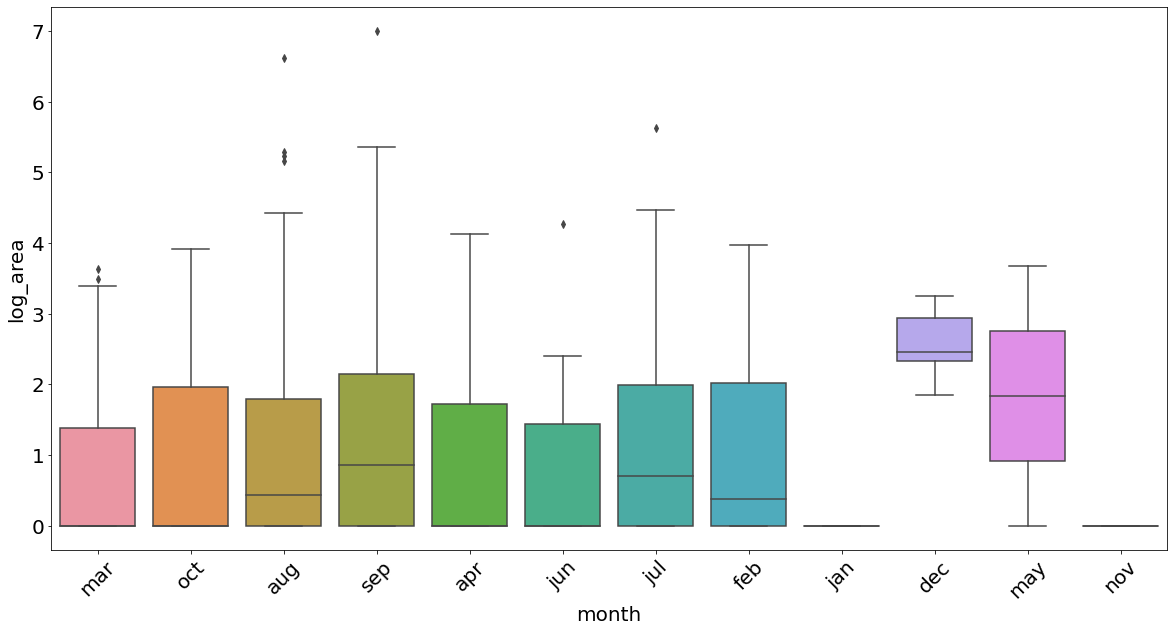

In [22]:
plt.figure(figsize=(20, 10))
plt.xlabel("Log_aera", fontsize=20)
plt.ylabel("Month", fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
sbs.boxplot(x=data["month"], y=data["log_area"])

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

month_data = pd.DataFrame({"month": data["month"], "area": data["area_type"]})

anova_model = ols("area ~ C(month)", data=month_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,21.777778,1.0,43.147298,1.264898e-10
C(month),10.147611,11.0,1.827726,4.687466e-02
Residual,254.889140,505.0,NaN,NaN


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

tmp_data = data[(data["month_type"] == 1) & (data["area"] > 0)]

month_data = pd.DataFrame({"month": tmp_data["month"], "area": tmp_data["area_type"]})

anova_model = ols("area ~ C(month)", data=month_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,20.250000,1.0,46.249886,3.657495e-09
C(month),3.981010,7.0,1.298915,2.648002e-01
Residual,28.897368,66.0,NaN,NaN


<AxesSubplot:xlabel='day', ylabel='log_area'>

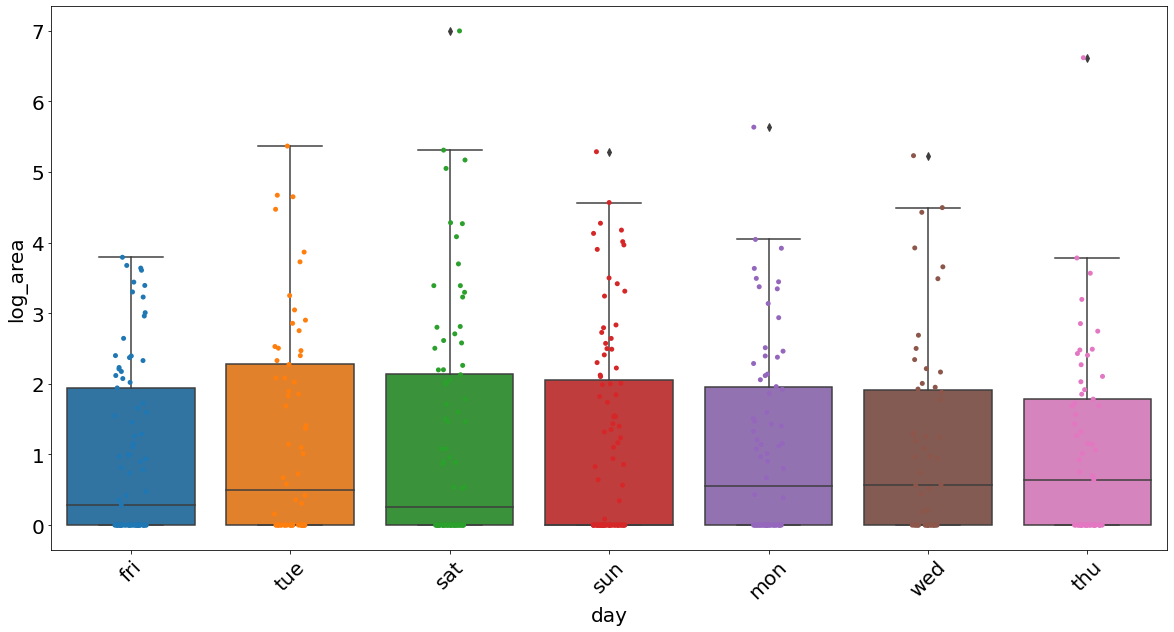

In [23]:
plt.figure(figsize=(20, 10))
plt.xlabel("Log_aera", fontsize=20)
plt.ylabel("Day", fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
sbs.boxplot(x=data["day"], y=data["log_area"])
sbs.stripplot(x=data["day"], y=data["log_area"])

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"day": data["day"], "area": data["log_area"]})

anova_model = ols("area ~ C(day)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,79.938705,1.0,40.570636,4.238699e-10
C(day),4.218600,6.0,0.356839,9.058998e-01
Residual,1004.882931,510.0,NaN,NaN


## Anova for temp

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"temp": data["temp"], "area": data["log_area"]})

anova_model = ols("area ~ C(temp)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,5.425299,1.0,3.075013,0.080447
C(temp),435.698378,191.0,1.292933,0.021618
Residual,573.403154,325.0,NaN,NaN


## Anova for RH

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"RH": data["RH"], "area": data["log_area"]})

anova_model = ols("area ~ C(RH)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,3.099787,1.0,1.622175,0.203458
C(RH),164.491500,74.0,1.163263,0.181997
Residual,844.610032,442.0,NaN,NaN


## Anova for FFMC

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"FFMC": data["FFMC"], "area": data["log_area"]})

anova_model = ols("area ~ C(FFMC)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,2.118275e-27,1.0,1.047041e-27,1.00000
C(FFMC),1.776051e+02,105.0,8.360792e-01,0.86546
Residual,8.314965e+02,411.0,NaN,NaN


## Anova for DC

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"DC": data["DC"], "area": data["log_area"]})

anova_model = ols("area ~ C(DC)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,2.090710e-28,1.0,1.059105e-28,1.000000
C(DC),4.208393e+02,218.0,9.779240e-01,0.567621
Residual,5.882622e+02,298.0,NaN,NaN


## Anova for DMC

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"DMC": data["DMC"], "area": data["log_area"]})

anova_model = ols("area ~ C(DMC)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,1.020867e-27,1.0,5.308262e-28,1.000000
C(DMC),4.283053e+02,214.0,1.040694e+00,0.373395
Residual,5.807962e+02,302.0,NaN,NaN


## Anova for wind

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"wind": data["wind"], "area": data["log_area"]})

anova_model = ols("area ~ C(wind)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,1.547921,1.0,0.802721,0.370716
C(wind),52.644343,20.0,1.365016,0.133757
Residual,956.457188,496.0,NaN,NaN


## Anova for ISI

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

day_data = pd.DataFrame({"ISI": data["ISI"], "area": data["log_area"]})

anova_model = ols("area ~ C(ISI)", data=day_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,7.315675e-28,1.0,3.608130e-28,1.000000
C(ISI),2.021355e+02,118.0,8.448672e-01,0.862489
Residual,8.069660e+02,398.0,NaN,NaN


<AxesSubplot:xlabel='day', ylabel='Count'>

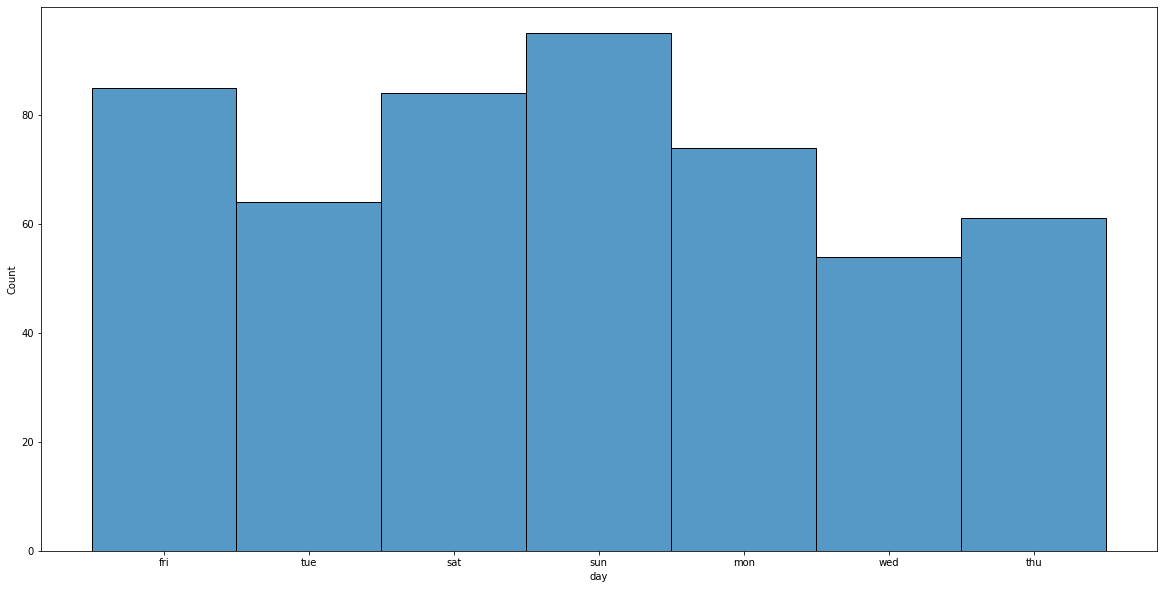

In [24]:
plt.figure(figsize=(20, 10))
sbs.histplot(data["day"])

## Interaction between month and day

<AxesSubplot:xlabel='month', ylabel='log_area'>

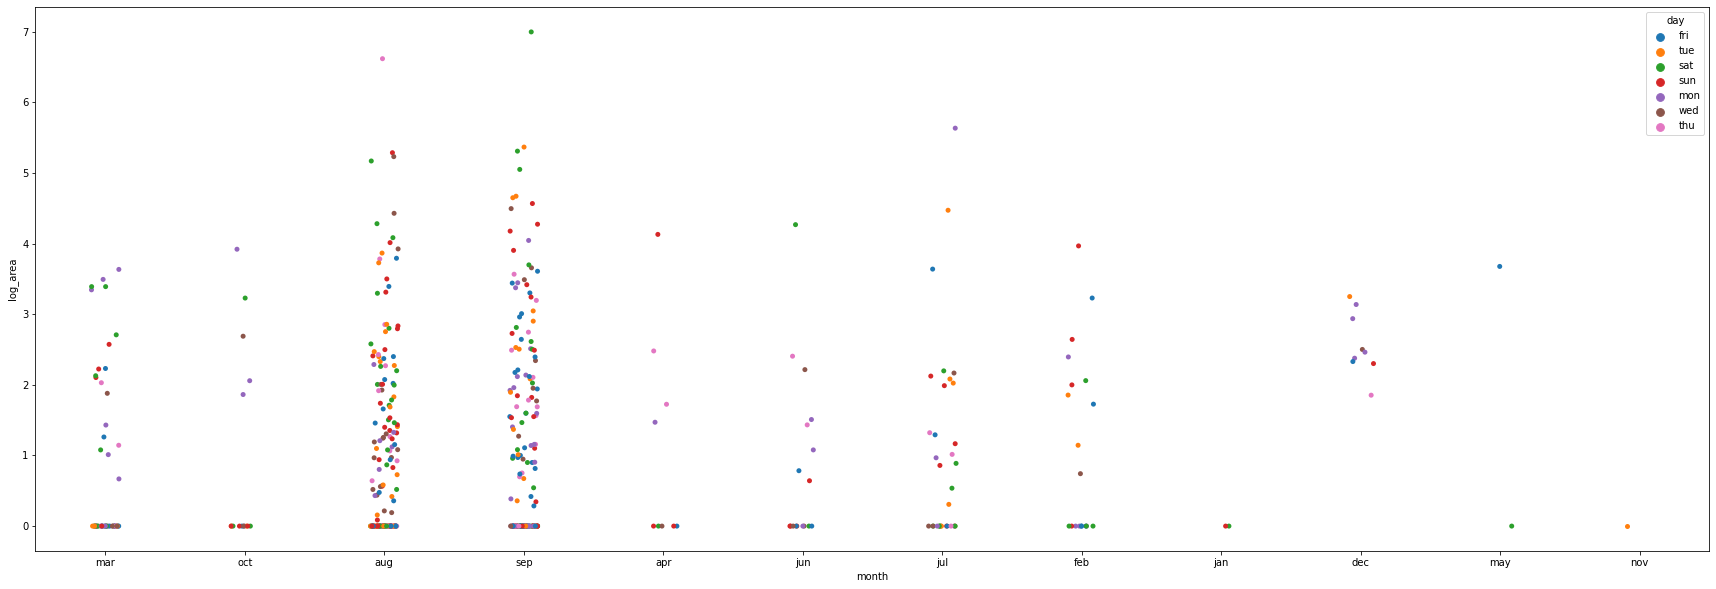

In [25]:
plt.figure(figsize=(30, 10))
sbs.stripplot(x="month", y="log_area", hue="day", data=data)

<AxesSubplot:xlabel='month', ylabel='log_area'>

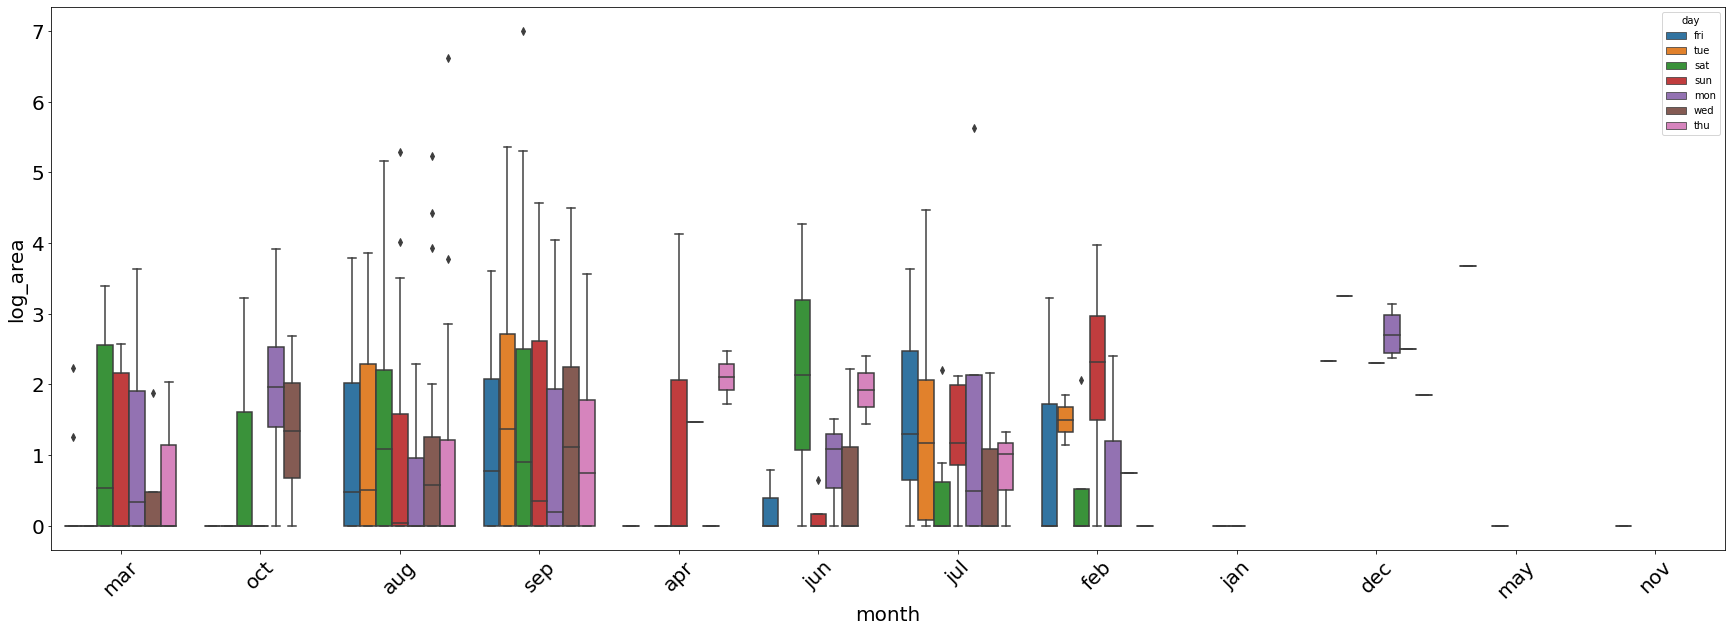

In [26]:
plt.figure(figsize=(30, 10))
plt.xlabel("Log_aera", fontsize=20)
plt.ylabel("Month", fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
sbs.boxplot(x="month", y="log_area", hue="day", data=data)

## Two-way ANOVA

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

time_data = pd.DataFrame({"day": data["day"], "month": data["month"], "area": data["log_area"]})
anova_model = ols("area ~ C(day)*C(month)", data=time_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day),6.0,4.218600,0.703100,0.355631,0.906564
C(month),11.0,39.797083,3.617917,1.829957,0.046878
C(day):C(month),66.0,89.304402,1.353097,0.684402,0.970764
Residual,453.0,895.603899,1.977051,NaN,NaN


# Linear regression - Experiment 1

In [15]:
import statsmodels.api as sm

X = data[["month_type", "FFMC", "DMC", "ISI", "temp", "wind", "DC"]].to_numpy()
X = sm.add_constant(X)
y = data["log_area"]

In [16]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = "log_area ~ month_type + FFMC + DMC + ISI + temp + wind + DC"

mod1 = smf.glm(formula=formula, data=data, family=sm.families.Gaussian()).fit()
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               log_area   No. Observations:                  517
Model:                            GLM   Df Residuals:                      509
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                          1.9469
Method:                          IRLS   Log-Likelihood:                -901.78
Date:                Sun, 18 Jul 2021   Deviance:                       990.96
Time:                        09:55:28   Pearson chi2:                     991.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4163      1.188     -0.350      0.7

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
mod1.get_prediction(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

1.916755673344904

# Linear regression - Experiment 2

In [ ]:
X = data[["month_type", "temp"]].to_numpy()
X = sm.add_constant(X)
y = data["log_area"].to_numpy()

In [76]:
import statsmodels.formula.api as smf

model_3 = olsmod = sm.OLS(y, X)
res = model_2.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:                        area   No. Observations:                  517
Model:                                 GEE   No. clusters:                      251
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                 247
Family:                            Poisson   Mean cluster size:                 2.1
Dependence structure:         Exchangeable   Num. iterations:                    21
Date:                     Sun, 18 Jul 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         09:07:47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1142      0.349      6.051      0.000       1.429       2.799
month_t

In [ ]:
y_pred = res.predict(X)
y_pred.shape

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

# Linear regression - Experiment 3

In [96]:
X = data[["month_type", "temp"]].to_numpy()
X = sm.add_constant(X)
y = data["log_area"].to_numpy()

In [97]:
import statsmodels.formula.api as smf

model_3 = olsmod = sm.OLS(y, X)
res = model_3.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9193
Date:                Sun, 18 Jul 2021   Prob (F-statistic):              0.399
Time:                        09:23:55   Log-Likelihood:                -905.55
No. Observations:                 517   AIC:                             1817.
Df Residuals:                     514   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7774      0.258      3.018      0.0

In [102]:
y_pred = res.predict(X)
y_pred.shape

(517,)

In [104]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

1.9448835214166968